# Data Processing - Mini Project

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectPercentile, chi2, f_classif,  mutual_info_classif

## Task 1: (30 points)

### Solution:

__Dataset__: Home Credit Default Risk

https://www.kaggle.com/competitions/home-credit-default-risk/data

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

There are multiple files under this kaggle dataset but for this project, we will be using the __bureau__ file. All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date. The dataset has over 10 million rows of data.

In [2]:
original_kaggle_df = pd.read_csv("/Users/varsha/Desktop/Sem 3/Data Processing/Mini project/Task 1/bureau.csv")
original_kaggle_df

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,-131,NaN
1,215354,5714463,Active,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,-20,NaN
2,215354,5714464,Active,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,-16,NaN
3,215354,5714465,Active,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,-16,NaN
4,215354,5714466,Active,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,138615,6745057,Closed,-1523,0,-1342.0,-1369.0,NaN,0,26301.96,0.0,NaN,0.0,-800,NaN
1048571,369065,6745058,Closed,-1650,0,-918.0,-918.0,NaN,0,127399.50,0.0,0.0,0.0,-864,NaN
1048572,369065,6745059,Active,-195,0,1419.0,NaN,NaN,0,639000.00,594391.5,0.0,0.0,-6,0.0
1048573,369065,6745060,Closed,-379,0,-6.0,-282.0,0.0,0,67500.00,0.0,0.0,0.0,-282,19039.5


In [3]:
# Handling null values

'''
Since a lot of columns have missing data and this was affecting the
results, we are dropping all the rows containing the missing values. 
We are also replacing all the nan values with 0 so that these rows can
be used without having the mean/medians changed to a great degree. 
We are trying to retrive a sample data as close to the population.
'''

kaggle_df = original_kaggle_df.dropna().reset_index()
kaggle_df = kaggle_df.drop(['index'], axis=1)
kaggle_df = kaggle_df.replace(np.nan, 0)
kaggle_df

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,298038,5715510,Closed,-586,0,-339.0,-553.0,0.000,0,40791.330,0.0,0.0,0.0,-553,67995.000
1,200527,5715537,Closed,-824,0,-521.0,-581.0,0.000,0,89415.000,0.0,0.0,0.0,-580,8245.395
2,393321,5715540,Closed,-146,0,935.0,-41.0,0.000,0,445262.940,0.0,0.0,0.0,-35,12162.150
3,296586,5715600,Closed,-359,0,-55.0,-55.0,0.000,0,77239.035,0.0,0.0,0.0,-50,0.000
4,190334,5715607,Closed,-2320,0,-1953.0,-1953.0,0.000,0,64851.750,0.0,0.0,0.0,-1155,16200.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25340,455726,6744995,Closed,-532,0,-379.0,-379.0,0.000,0,22901.175,0.0,0.0,0.0,-373,0.000
25341,280262,6745024,Closed,-858,0,-554.0,-585.0,0.000,0,69525.000,0.0,0.0,0.0,-580,0.000
25342,387533,6745028,Closed,-1066,0,-518.0,-518.0,3801.105,0,48055.500,0.0,0.0,0.0,-513,0.000
25343,291667,6745047,Closed,-1540,0,-1222.0,-1222.0,0.000,0,44073.990,0.0,0.0,0.0,-1222,0.000


In [4]:
# Standardization 

'''
Since AMT_CREDIT_SUM column comparatively contains a more higher magnitude
values, I am standardizing that column to gain a scaled common level 
for all the other features to be evaluated.
'''

#kaggle_df_std = StandardScaler().fit_transform(kaggle_df_copy)
kaggle_df['AMT_CREDIT_SUM'] = (kaggle_df['AMT_CREDIT_SUM'] - kaggle_df['AMT_CREDIT_SUM'].mean()) / kaggle_df['AMT_CREDIT_SUM'].std()
kaggle_df

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,298038,5715510,Closed,-586,0,-339.0,-553.0,0.000,0,-0.312391,0.0,0.0,0.0,-553,67995.000
1,200527,5715537,Closed,-824,0,-521.0,-581.0,0.000,0,-0.198875,0.0,0.0,0.0,-580,8245.395
2,393321,5715540,Closed,-146,0,935.0,-41.0,0.000,0,0.631886,0.0,0.0,0.0,-35,12162.150
3,296586,5715600,Closed,-359,0,-55.0,-55.0,0.000,0,-0.227301,0.0,0.0,0.0,-50,0.000
4,190334,5715607,Closed,-2320,0,-1953.0,-1953.0,0.000,0,-0.256220,0.0,0.0,0.0,-1155,16200.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25340,455726,6744995,Closed,-532,0,-379.0,-379.0,0.000,0,-0.354157,0.0,0.0,0.0,-373,0.000
25341,280262,6745024,Closed,-858,0,-554.0,-585.0,0.000,0,-0.245310,0.0,0.0,0.0,-580,0.000
25342,387533,6745028,Closed,-1066,0,-518.0,-518.0,3801.105,0,-0.295432,0.0,0.0,0.0,-513,0.000
25343,291667,6745047,Closed,-1540,0,-1222.0,-1222.0,0.000,0,-0.304727,0.0,0.0,0.0,-1222,0.000


In [5]:
# Handling categorical data

'''
Since I do not want to just remove the category column values and would
want to keep those values, I decided to convert the categorical values
to numerical values where I replaced active with 1 and closed as 0.
'''

kaggle_df_copy = kaggle_df
kaggle_df_copy['CREDIT_STATUS'] = kaggle_df_copy['CREDIT_ACTIVE'].map({'Closed':0,'Active':1})
kaggle_df_copy = kaggle_df_copy.drop(['CREDIT_ACTIVE'], axis=1)
kaggle_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25345 entries, 0 to 25344
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_CURR              25345 non-null  int64  
 1   SK_ID_BUREAU            25345 non-null  int64  
 2   DAYS_CREDIT             25345 non-null  int64  
 3   CREDIT_DAY_OVERDUE      25345 non-null  int64  
 4   DAYS_CREDIT_ENDDATE     25345 non-null  float64
 5   DAYS_ENDDATE_FACT       25345 non-null  float64
 6   AMT_CREDIT_MAX_OVERDUE  25345 non-null  float64
 7   CNT_CREDIT_PROLONG      25345 non-null  int64  
 8   AMT_CREDIT_SUM          25345 non-null  float64
 9   AMT_CREDIT_SUM_DEBT     25345 non-null  float64
 10  AMT_CREDIT_SUM_LIMIT    25345 non-null  float64
 11  AMT_CREDIT_SUM_OVERDUE  25345 non-null  float64
 12  DAYS_CREDIT_UPDATE      25345 non-null  int64  
 13  AMT_ANNUITY             25345 non-null  float64
 14  CREDIT_STATUS           25245 non-null

In [6]:
# One-hot encoding

'''
Another way of handling categorical values is by using one-hot encoding.
One-hot encoding is the process by which categorical data are converted 
into numerical data for use in machine learning. Categorical features 
are turned into binary features that are “one-hot” encoded, meaning 
that if a feature is represented by that column, it receives a 1. 
Otherwise, it receives a 0.
'''

start_time = time.time()
category = kaggle_df.select_dtypes(include='object')
category_cols = category.columns.tolist()
numerical = kaggle_df.select_dtypes(exclude='object')
numerical_cols = numerical.columns.tolist()

transformation = OneHotEncoder().fit_transform(kaggle_df[category_cols[:-1]])
normalization = (kaggle_df[numerical_cols]-kaggle_df[numerical_cols].mean())/kaggle_df[numerical_cols].std()
print ("Time taken for one-hot encoding and normalization:\n",time.time()-start_time)

Time taken for one-hot encoding and normalization:
 0.006094932556152344


In [7]:
# Multicollinearity

'''
Multicollinearity can be detected using various techniques, one such 
technique being the Variance Inflation Factor(VIF). We use VIF here since 
we get to pick each feature and regress it against all of the other features. 
'''

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('AMT_CREDIT_SUM ~ AMT_CREDIT_SUM_DEBT+AMT_CREDIT_SUM+CNT_CREDIT_PROLONG', data=kaggle_df, return_type='dataframe')
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df

,variable,VIF
0,Intercept,1.007293
1,AMT_CREDIT_SUM_DEBT,1.002016
2,AMT_CREDIT_SUM,1.001477
3,CNT_CREDIT_PROLONG,1.000539


## Task 2: (35 points)


### Solution:

In [8]:
# Importing data

X = pd.read_csv("/Users/varsha/Desktop/Sem 3/Data Processing/Mini project/Task 2/farm-ads.csv")
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)
X

,Data
0,1 ad-jerry ad-bruckheimer ad-chase ad-premier ...
1,-1 ad-rheumatoid ad-arthritis ad-expert ad-tip...
2,-1 ad-rheumatologist ad-anju ad-varghese ad-yo...
3,-1 ad-siemen ad-water ad-remediation ad-water ...
4,-1 ad-symptom ad-muscle ad-weakness ad-genetic...
...,...
4167,-1 ad-affordable ad-ivf ad-cost ad-efficient a...
4168,1 ad-mozypro ad-business ad-backup ad-affordab...
4169,1 ad-oster ad-line ad-clipper ad-oster ad-fact...
4170,-1 ad-synrevoice ad-schoolconnect ad-trust ad-...


In [9]:
Y = pd.read_csv("/Users/varsha/Desktop/Sem 3/Data Processing/Mini project/Task 2/farm-ads-vect.csv")
Y.replace([np.inf, -np.inf], np.nan, inplace=True)
Y.fillna(0, inplace=True)

In [10]:
# Handling categorical data

X_list = X.Data.values.tolist()
n=0

for i in X_list:
    if i.startswith('1')==True:
        X_list[n]=1
    else:
        X_list[n]=-1
    n+=1

X_num = pd.DataFrame({'Data':X_list})
X_num

,Data
0,1
1,-1
2,-1
3,-1
4,-1
...,...
4167,-1
4168,1
4169,1
4170,-1


In [11]:
Y_list = Y.Data.values.tolist()
n=0

for i in Y_list:
    if i.startswith('1')==True:
        Y_list[n]=1
    else:
        Y_list[n]=-1
    n+=1

Y_num = pd.DataFrame({'Data':Y_list})

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


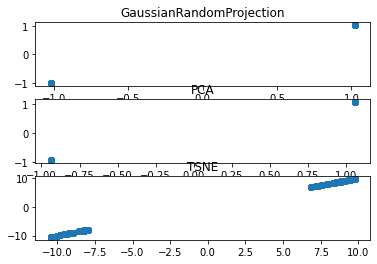

In [12]:
# PCA and t-SNE

transformers = []
transformers += [
  GaussianRandomProjection(n_components=1),
  PCA(n_components=1),
  TSNE(n_components=1),
]
for i, transformer in enumerate(transformers):
  Xp = transformer.fit_transform(X_num)
  plt.subplot(len(transformers), 1, i + 1)
  transStr = str(transformer)
  transStr = transStr[:transStr.find("(")]
  plt.title(transStr)
  plt.scatter(Xp[:, 0], Xp[:, 0])
plt.show()

# Multi-dimensional scaling

mds = MDS(random_state=0)
scaled_df = mds.fit_transform(X_num)

# Since the data contains 1 column, n_components can be max of 1 and any value more than that throws error

In [13]:
# Logistic Regression Model

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(Y_num, Y_num, test_size = 0.3)

model = LogisticRegression()
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

classification_report(y_test_data, predictions)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'              precision    recall  f1-score   support\n\n          -1       1.00      1.00      1.00      1190\n           1       1.00      1.00      1.00      1322\n\n    accuracy                           1.00      2512\n   macro avg       1.00      1.00      1.00      2512\nweighted avg       1.00      1.00      1.00      2512\n'

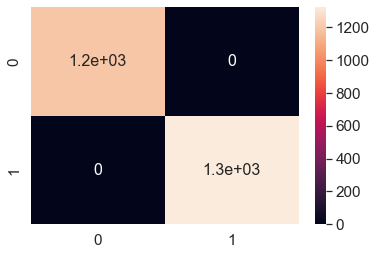

In [14]:
# Plotting the results

cm = confusion_matrix(y_test_data, predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size":16})
plt.show()

## Task 3: (35 points)


### Solution:

#### 1) EEG Steady-State Visual Evoked Potential Signals Data Set 

In [15]:
signal_df = pd.read_csv("/Users/varsha/Desktop/Sem 3/Data Processing/Mini project/Task 3/A017SM1_1.csv")
signal_df.head()

,Domain,Interpolated signal,Electrode signal 1,Electrode signal 2,Electrode signal 3,Electrode signal 4,Electrode signal 5,Electrode signal 6,Electrode signal 7,Electrode signal 8,Electrode signal 9,Electrode signal 10,Electrode signal 11,Electrode signal 12,Electrode signal 13,Electrode signal 14
0,13,0,4125.640925,4141.538360,4151.794770,4156.922975,4151.281950,4166.153744,4139.487078,4139.999899,4183.589641,4164.102462,4198.974256,4134.871694,4157.435796,4150.256309
1,14,0,4119.999899,4130.769130,4148.717847,4148.205027,4170.256308,4175.897334,4145.640924,4144.102463,4185.128103,4172.307590,4192.307590,4137.435796,4151.281950,4146.666565
2,15,0,4115.384515,4125.128104,4136.410155,4153.333232,4177.948616,4176.410154,4145.128104,4141.538360,4185.128103,4172.307590,4187.692205,4148.205027,4149.743488,4142.051181
3,16,0,4122.564002,4125.640925,4149.743488,4139.487078,4154.871693,4168.717847,4137.948617,4136.922976,4184.102462,4169.743488,4199.999897,4145.640924,4167.692206,4155.384514
4,17,0,4113.846053,4115.384515,4180.512718,4119.487079,4149.230668,4165.128103,4138.974258,4136.410155,4182.564000,4164.615283,4202.564000,4132.820412,4176.922975,4165.640924


In [16]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5888 entries, 0 to 5887
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Domain               5888 non-null   int64  
 1   Interpolated signal  5888 non-null   int64  
 2   Electrode signal 1   5888 non-null   float64
 3   Electrode signal 2   5888 non-null   float64
 4   Electrode signal 3   5888 non-null   float64
 5   Electrode signal 4   5888 non-null   float64
 6   Electrode signal 5   5888 non-null   float64
 7   Electrode signal 6   5888 non-null   float64
 8   Electrode signal 7   5888 non-null   float64
 9   Electrode signal 8   5888 non-null   float64
 10  Electrode signal 9   5888 non-null   float64
 11  Electrode signal 10  5888 non-null   float64
 12  Electrode signal 11  5888 non-null   float64
 13  Electrode signal 12  5888 non-null   float64
 14  Electrode signal 13  5888 non-null   float64
 15  Electrode signal 14  5888 non-null   f

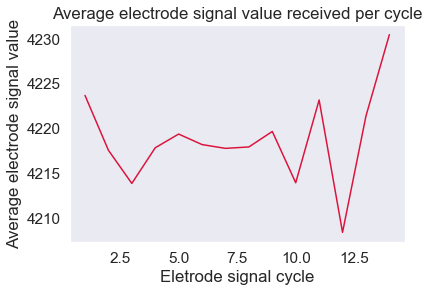

In [17]:
'''
There are 14 electrode signal readings collected for each domain.
We will consider 1 electrode reading as 1 reading cycle.
Let us now calculate average value of electrode signal for each
raeding cycle for all domain readings. Let us also plot the same.

We can see that the 12th reading cycle comparatively has the lowest
average value (below 4210) and 14th has the highest (above 4230).
'''

signal_col_avg = signal_df.select_dtypes(include=['floating']).mean(axis=0)
signal_col_avg = signal_col_avg.values.tolist()

fig, ax = plt.subplots()
ax.plot([* range(1,15,1)], signal_col_avg, color='crimson')

ax.set(xlabel='Eletrode signal cycle', ylabel='Average electrode signal value',
       title='Average electrode signal value received per cycle')
ax.grid()
plt.show()

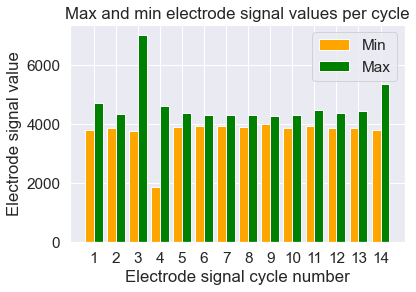

In [18]:
'''
Let us now compute the minimum nad maximum values for each reading
cycle and compare them using using a bar plot.

The minimum value: Cycle 4 with less than 2000 signal value.
The maximum value: Cycle 3 with more than 6000 signal value.
'''

cat_names = list(range(1,15))
signal_col_max = signal_df.select_dtypes(include=['floating']).max()
signal_col_min = signal_df.select_dtypes(include=['floating']).min()

X_axis = np.arange(len(cat_names))
  
plt.bar(X_axis - 0.2, signal_col_min, 0.4, label = 'Min',  color="orange")
plt.bar(X_axis + 0.2, signal_col_max, 0.4, label = 'Max', color="green")
  
plt.xticks(X_axis, cat_names)
plt.xlabel("Electrode signal cycle number")
plt.ylabel("Electrode signal value")
plt.title("Max and min electrode signal values per cycle")
plt.legend()
plt.show()

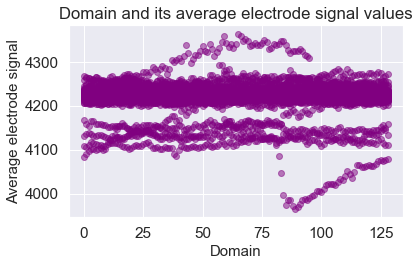

In [19]:
'''
We have played around plenty while comparing the electrode signal
values and now it is time to analyze the domain column values.
Therefore, let us compare to see how different domains vs its signal values.
'''

signal_df['Mean'] = signal_df.select_dtypes(include=['floating']).mean(axis=1)

fig, ax = plt.subplots()
ax.scatter(signal_df['Domain'], signal_df['Mean'], color="purple", alpha=0.5)

ax.set_xlabel('Domain', fontsize=15)
ax.set_ylabel('Average electrode signal', fontsize=15)
ax.set_title('Domain and its average electrode signal values')

ax.grid(True)
fig.tight_layout()

plt.show()

#### 2) Repeat Consumption Matrices Data Set

In [20]:
consumption_df = pd.read_csv("/Users/varsha/Desktop/Sem 3/Data Processing/Mini project/Task 3/train.csv")
consumption_df.head()

,Col 1,Col 2,Col 3
0,0,741,1
1,0,877,189
2,0,5773,1
3,0,6492,3
4,0,7083,2


In [21]:
consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379550 entries, 0 to 379549
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Col 1   379550 non-null  int64
 1   Col 2   379550 non-null  int64
 2   Col 3   379550 non-null  int64
dtypes: int64(3)
memory usage: 8.7 MB


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


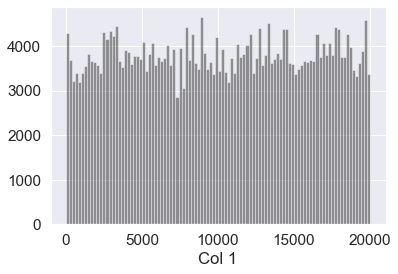

In [22]:
'''
Let's try to analyze and see how the column 1 values range throughout the dataset. 
By this we can analyze if the column 1 exhibit consistency or any kind of particular pattern.
As we can see from the plot below, the data in col 1 is very inconsistent throughout the dataset.
We can also see that the maximum and minimum frequency of a particular value is seen to be 
around the median value of the dataset.
'''

sns.distplot(consumption_df['Col 1'],bins=100,kde=False, color='black')
plt.show()

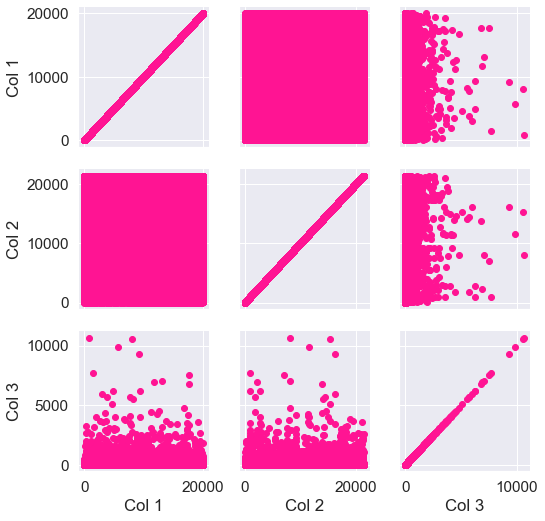

In [23]:
'''
Now let's try analyzing each column data with each other and analyze the pattern.
As you can see, each column data plotted against itself will obviously show a linear relationship.
Col 3 with col 1 and 2 show that the density of the scattered dots are more towards the lower 
values but there does exist a few outlier values.
The most interesting is col 1 and 2 data which shows a whole variety of combination as the dots cover the whole plot.
'''

grids = sns.PairGrid(consumption_df)
grids.map(plt.scatter, color='deeppink')

<AxesSubplot:>

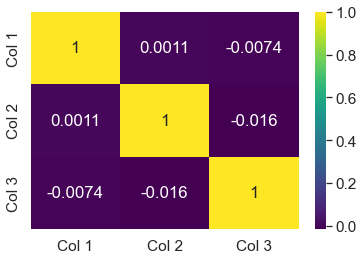

In [24]:
'''
Lastly, let us take a look at the correlation between all the columns of the dataset.
The only positive correlation that exists is between col 1 and col 2.
'''

sns.heatmap(consumption_df.corr(),cmap='viridis',annot=True)